In [1]:
#importando
import numpy as np
import matplotlib.pyplot as plt
import numpy.linalg as la
from numpy.linalg import pinv

In [2]:
#carregando dados
data = np.loadtxt('dados.txt', delimiter=',', skiprows=1)

#organizando em matrizes
t = data[:, 0] #tempo
u = data[:, 1] #entrada

x = data[:, 2] #saida c/ ruido (utilizar para treinar)
y = data[:, 3] #saida c/ ruido (utilizar para treinar)

x1 = data[:, 4] #saida s/ ruido
y1 = data[:, 5] #saida s/ ruido

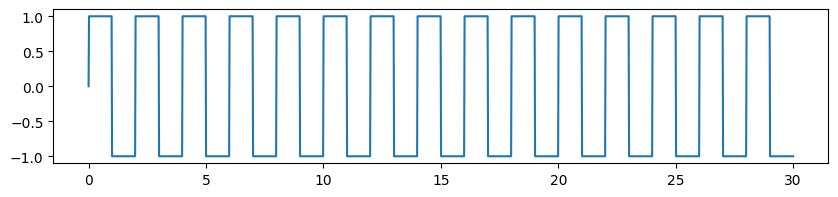

In [ ]:
#plotando entrada
plt.figure(figsize=(10, 2))
plt.plot(t, u)
plt.show()

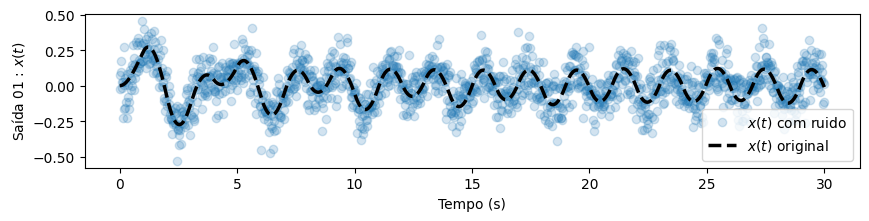

In [ ]:
#plotando x
plt.figure(figsize=(10, 2))
plt.plot(t, x, 'o', alpha = 0.2, label='$x(t)$ com ruido')
plt.plot(t, x1, '--k', lw = 2.5, label='$x(t)$ original')
plt.xlabel('Tempo (s)')
plt.ylabel('Saída 01 : $x(t)$')
plt.legend()

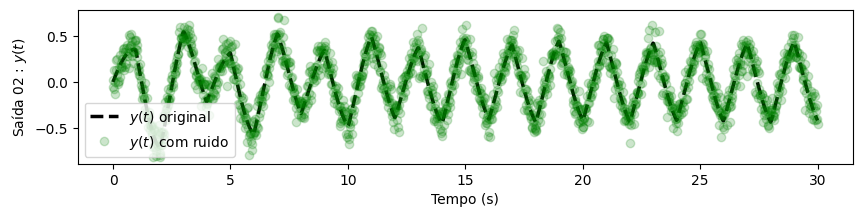

In [ ]:
#plotando y
plt.figure(figsize=(10, 2))
plt.plot(t, y1, '--k', lw = 2.5, label='$y(t)$ original')
plt.plot(t, y, 'og', alpha=0.2, label='$y(t)$ com ruido')
plt.xlabel('Tempo (s)')
plt.ylabel('Saída 02 : $y(t)$')
plt.legend()


In [18]:
c = np.linspace(t[0], t[-1], 100)
s2 = 1

phi = np.exp(-((t[:, None] - c[None, :]) ** 2) / (2 * s2 * 2))
print(phi)

[[1.00000000e+00 9.77304662e-01 9.12262625e-01 ... 1.55594094e-94
  1.76944623e-96 1.92194773e-98]
 [9.99900005e-01 9.80172661e-01 9.17716501e-01 ... 2.08740123e-94
  2.38103753e-96 2.59409865e-98]
 [9.99600080e-01 9.82852486e-01 9.23018361e-01 ... 2.79983155e-94
  3.20337847e-96 3.50061656e-98]
 ...
 [3.50061656e-98 3.20337847e-96 2.79983155e-94 ... 9.23018361e-01
  9.82852486e-01 9.99600080e-01]
 [2.59409865e-98 2.38103753e-96 2.08740123e-94 ... 9.17716501e-01
  9.80172661e-01 9.99900005e-01]
 [1.92194773e-98 1.76944623e-96 1.55594094e-94 ... 9.12262625e-01
  9.77304662e-01 1.00000000e+00]]


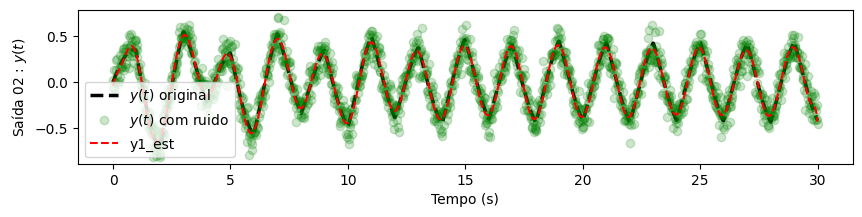

In [25]:
w1 = la.pinv(phi) @ y #para saida 1
y_est = phi @ w1
plt.figure(figsize=(10, 2))
plt.plot(t, y1, '--k', lw = 2.5, label='$y(t)$ original')
plt.plot(t, y, 'og', alpha=0.2, label='$y(t)$ com ruido')
plt.plot(t, y_est, 'r--', label = "y1_est")
plt.xlabel('Tempo (s)')
plt.ylabel('Saída 02 : $y(t)$')
plt.legend()
plt.show()

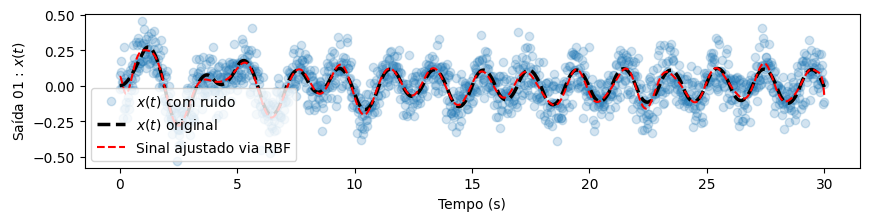

In [24]:
w2 = la.pinv(phi) @ x #para saida 2
x_est = phi @ w2
plt.figure(figsize=(10, 2))
plt.plot(t, x, 'o', alpha = 0.2, label='$x(t)$ com ruido')
plt.plot(t, x1, '--k', lw = 2.5, label='$x(t)$ original')
plt.plot(t, x_est, 'r--', label = "Sinal ajustado via RBF")
plt.xlabel('Tempo (s)')
plt.ylabel('Saída 01 : $x(t)$')
plt.legend()
plt.show()

In [28]:
#calculando erro
EMQx = np.mean((x - x_est) ** 2)
EMQy = np.mean((y - y_est) ** 2)

print(EMQx)
print(EMQy)

0.009881595390983395
0.01026813965912311


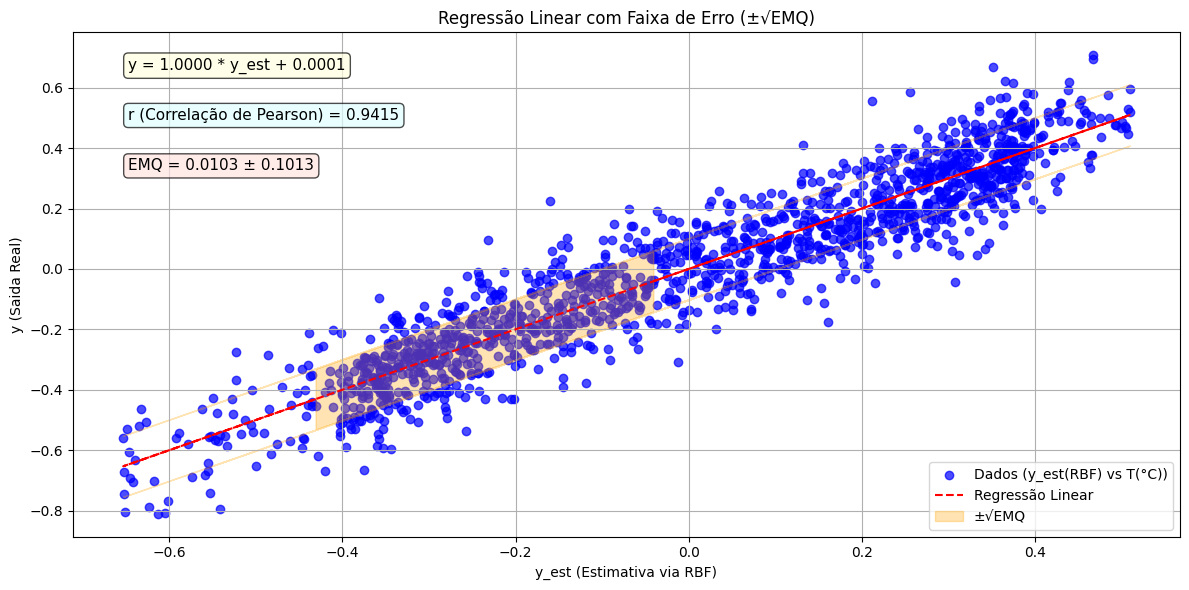

In [ ]:
from scipy.stats import linregress, pearsonr

RMSE = np.sqrt(EMQy)  

a, b, r_val, p_val, std_err = linregress(y_est, y)
corr, _ = pearsonr(y_est, y)
y_reg = a * y_est + b

plt.figure(figsize=(12, 6))
plt.scatter(y_est, y, alpha = 0.7, label = 'Dados (y_est(RBF) vs y)', color = 'blue')
plt.plot(y_est, y_reg, '--r', label = 'Regressão Linear')

plt.fill_between(y_est, y_reg - RMSE, y_reg + RMSE,
                 color = 'orange', alpha = 0.3, label = '±√EMQ')

reg_eq = f"y = {a:.4f} * y_est + {b:.4f}"
corr_text = f"r (Correlação de Pearson) = {corr:.4f}"
emq_text = f"EMQ = {EMQy:.4f} ± {RMSE:.4f}"

plt.text(0.05, 0.95, reg_eq, transform=plt.gca().transAxes,
         fontsize = 11, verticalalignment = 'top',
         bbox = dict(boxstyle = "round", facecolor = 'lightyellow', alpha = 0.7))

plt.text(0.05, 0.85, corr_text, transform=plt.gca().transAxes,
         fontsize = 11, verticalalignment = 'top',
         bbox = dict(boxstyle = "round", facecolor = 'lightcyan', alpha = 0.7))

plt.text(0.05, 0.75, emq_text, transform=plt.gca().transAxes,
         fontsize = 11, verticalalignment = 'top',
         bbox = dict(boxstyle = "round", facecolor = 'mistyrose', alpha = 0.7))

plt.xlabel("y_est (Estimativa via RBF)")
plt.ylabel("y (Saida Real)")
plt.title("Regressão Linear com Faixa de Erro (±√EMQ)")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


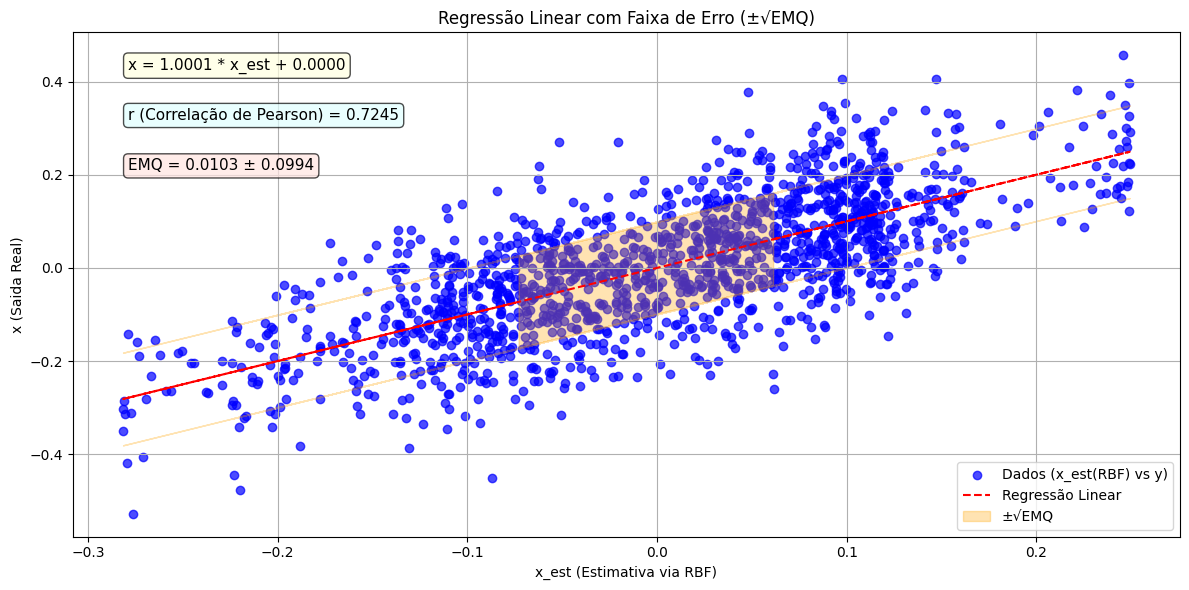

In [32]:
RMSE = np.sqrt(EMQx)  

a, b, r_val, p_val, std_err = linregress(x_est, x)
corr, _ = pearsonr(x_est, x)
x_reg = a * x_est + b

plt.figure(figsize=(12, 6))
plt.scatter(x_est, x, alpha = 0.7, label = 'Dados (x_est(RBF) vs y)', color = 'blue')
plt.plot(x_est, x_reg, '--r', label = 'Regressão Linear')

plt.fill_between(x_est, x_reg - RMSE, x_reg + RMSE,
                 color = 'orange', alpha = 0.3, label = '±√EMQ')

reg_eq = f"x = {a:.4f} * x_est + {b:.4f}"
corr_text = f"r (Correlação de Pearson) = {corr:.4f}"
emq_text = f"EMQ = {EMQy:.4f} ± {RMSE:.4f}"

plt.text(0.05, 0.95, reg_eq, transform=plt.gca().transAxes,
         fontsize = 11, verticalalignment = 'top',
         bbox = dict(boxstyle = "round", facecolor = 'lightyellow', alpha = 0.7))

plt.text(0.05, 0.85, corr_text, transform=plt.gca().transAxes,
         fontsize = 11, verticalalignment = 'top',
         bbox = dict(boxstyle = "round", facecolor = 'lightcyan', alpha = 0.7))

plt.text(0.05, 0.75, emq_text, transform=plt.gca().transAxes,
         fontsize = 11, verticalalignment = 'top',
         bbox = dict(boxstyle = "round", facecolor = 'mistyrose', alpha = 0.7))

plt.xlabel("x_est (Estimativa via RBF)")
plt.ylabel("x (Saida Real)")
plt.title("Regressão Linear com Faixa de Erro (±√EMQ)")
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()
